This Jupyter notebook offers an interactive tutorial on utilizing the PreFab library to anticipate the fabrication outcomes of nanoscale structures, specifically for a silicon nitride process with angled sidewalls. This tutorial is structured as follows:

1. Preparing a device image for prediction
2. Executing a prediction for each edge
3. Interpreting the prediction

To begin, we need to import the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import prefab as pf

The first step involves preparing a device image for prediction. This requires loading an image of a device as a numpy matrix with binary pixel values: 0 or 1. In this tutorial, we'll use an image of a small ring, but feel free to explore with other structures available in the `devices/` directory, or include your own images.

The image scale should ideally be 1 nm/px. If not, ensure you specify the actual length of the device image (in nanometers) when loading the image. Please feel free to explore other device lengths as well.

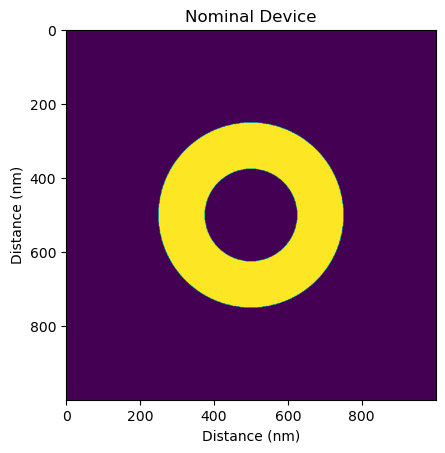

In [2]:
device = pf.load_device_img(path='../devices/ring_64x128_256x256.png', img_length_nm=1000)

plt.imshow(device)
plt.title('Nominal Device')
plt.ylabel('Distance (nm)')
plt.xlabel('Distance (nm)')
plt.show()

In the next step, we proceed with the prediction for the angled sidewall process. Each model is labeled by its type ('p' for predictor), fabrication facility and process name, model version, and dataset version. We use upper and lower model_tag suffixes to do two predictions, one for each edge. Refer to `docs/models.md` for the list of available models.

You can also choose if you want a ternarized output. The predictor, by default, produces raw predictions, which includes "fuzzy" areas of the structure that might vary between different fabrication runs or even different device instances on the same chip. When ternarized, the predictor outputs the most probable fabrication outcome.


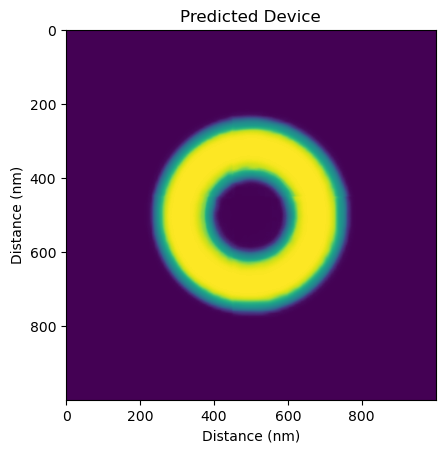

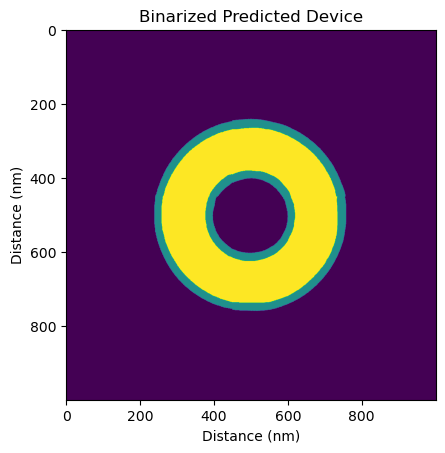

In [3]:
# Note: Initial prediction may take longer due to server startup and model loading. Subsequent predictions should be quicker.
MODEL_NAME = 'ANT_SiN'
MODEL_TAGS = ['v5-d0-upper', 'v5-d0-lower']
prediction = pf.predict(device=device, model_name=MODEL_NAME, model_tags=MODEL_TAGS)

plt.imshow(prediction)
plt.title('Predicted Device')
plt.ylabel('Distance (nm)')
plt.xlabel('Distance (nm)')
plt.show()

plt.imshow(pf.ternarize(prediction))
plt.title('Binarized Predicted Device')
plt.ylabel('Distance (nm)')
plt.xlabel('Distance (nm)')
plt.show()

Finally, we examine the prediction. By overlaying the contour of the original device on the predicted outcome, we can observe the extent of over-etching on the upper edge and under-etching on the lower edge.

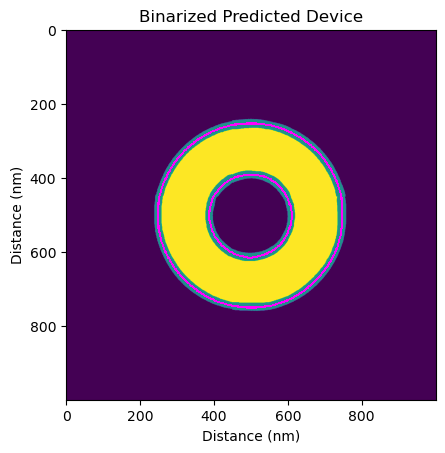

In [4]:
plt.imshow(pf.ternarize(prediction))
plt.imshow(pf.generate_device_contour(prediction), cmap='spring')
plt.title('Binarized Predicted Device')
plt.ylabel('Distance (nm)')
plt.xlabel('Distance (nm)')
plt.show()

And with that, we conclude this tutorial! You're now ready to use the prediction to simulate expected performance, or even to refine your design to decrease variation and uncertainty (refer to the device correction examples). We would love to hear your comments, questions, and suggestions on how to implement this prediction in simulation. Happy designing!